In [1]:
using XLSX
using Plots
using JLD

include("FCSeqTools.jl");

In [92]:
# LOAD FROM FILES
f_name = "aba3304_table_s1.xlsx"
xf = XLSX.readxlsx(f_name)
sh = xf["Sheet1"];

In [93]:
# READ MSA's
init, fin = 4, 1133
MSA_nat = Array{Char}(undef, 1130, 96)
for i ∈ init:fin
    for j ∈ 1:96
        MSA_nat[i - 3, j] = Char(sh[i, 3][j])
    end
end

MSA_paper  = do_number_matrix_prot(MSA_nat, 0.2); 
MSA_model = do_number_matrix_prot(do_letter_matrix("CM_130530_MC.fasta"), 0.2); # model

In [112]:
# UPLOAD AND COMPUTE FIELDS AND COUPLINGS
q = 21;
fields_paper = log.(freq_single_point(MSA_paper, q, 0.2))
fields_model = JLD.load("h.jld")["data"]
couplings_model = JLD.load("Jij.jld")["data"]

L_paper = length(MSA_paper[:,1]);
L_model = length(MSA_model[:,1]);

In [118]:
# PROFILE MODEL ENERGIES
function profile_energy(q, fields, MSA, L_MSA)
    energies = []
    for i in 1:L_MSA
        seq = MSA[i,:]'
        freq = freq_single_point(seq, q, 0.0); 
        push!(energies, - sum(freq .* fields))
    end
    return energies
end

# FULL MODEL ENERGIES
function full_model_energy(q, fields, couplings, MSA, L_MSA)
    full_energies = []
    for i in 1:L_MSA
        seq = MSA[i,:]' #paper
        freq = freq_single_point(seq, q, 0.0) 
        fij = fij_two_point(seq, q, 0.0)
        push!(full_energies, -sum(fij .* couplings) -sum(freq .* fields))
    end
    return full_energies
end

full_model_energy (generic function with 1 method)

In [127]:
prof_energy1 = profile_energy(q, fields_paper, MSA_paper, L_paper);
prof_energy2 = profile_energy(q, fields_model, MSA_model, L_model);
prof_energy3 = profile_energy(q, fields_model, MSA_paper, L_paper);
prof_energy4 = profile_energy(q, fields_paper, MSA_model, L_model);

full_energy1 = full_model_energy(q, fields_model, couplings_model, MSA_model, L_model)
full_energy2 = full_model_energy(q, fields_model, couplings_model, MSA_paper, L_paper);

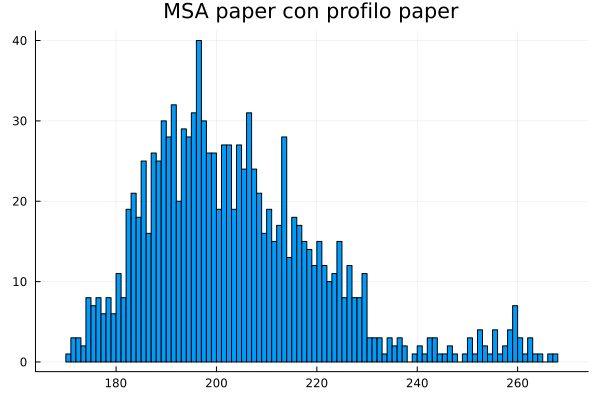

In [128]:
histogram(prof_energy1, bins=100, title= "MSA paper con profilo paper", label =:false)

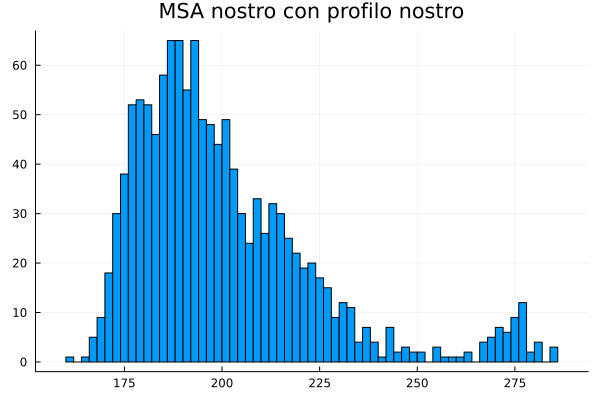

In [129]:
histogram(prof_energy2, bins=100, title= "MSA nostro con profilo nostro", label =:false)

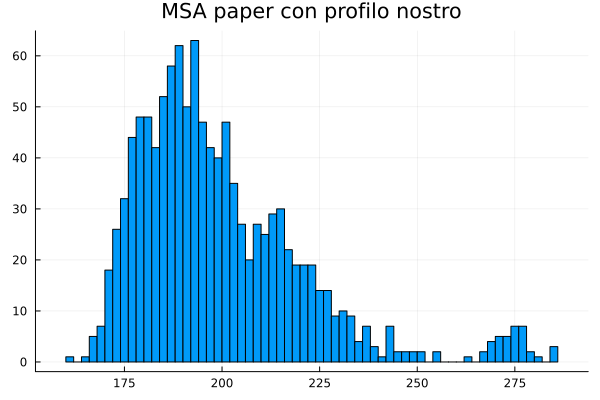

In [130]:
histogram(prof_energy3, bins=100, title= "MSA paper con profilo nostro", label =:false)

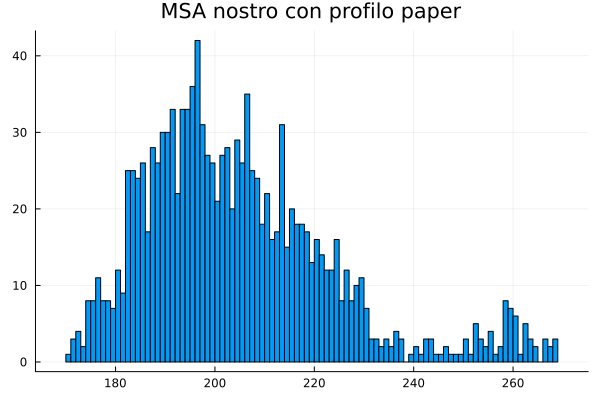

In [131]:
histogram(prof_energy4, bins=100, title= "MSA nostro con profilo paper", label =:false)

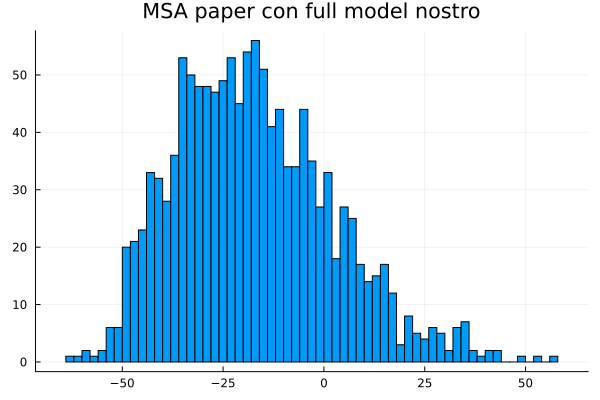

In [132]:
histogram(full_energy1, bins=100, title= "MSA paper con full model nostro", label =:false)

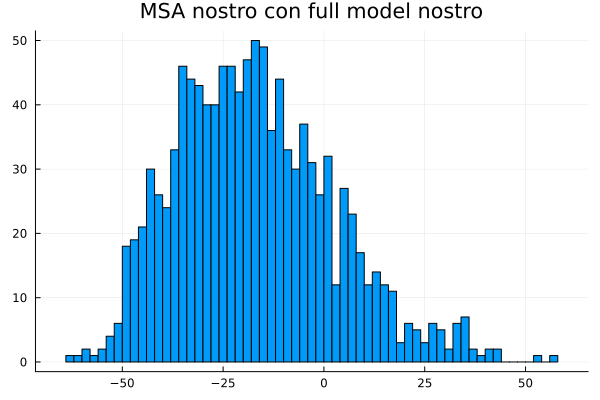

In [133]:
histogram(full_energy2, bins=100, title= "MSA nostro con full model nostro", label =:false)

In [69]:
cor(fields,fields2)

0.9746398484747035

In [89]:
couplings2 = JLD.load("Jij_0.3.jld")["data"]; # model

# Mutated MSA

In [193]:
function mutation_MSA(q, seq)
    MSA_mut1 = []
    c = 0
    for i in seq
        c += 1
        if i != q
            for a in 1:q - 1
                if a != i 
                    new_seq = copy(seq)
                    new_seq[c] = a
                    push!(MSA_mut1, new_seq)
                end
            end
        end
    end

    L_MSA = length(MSA_mut1)
    L_prot = length(MSA_mut1[1])

    MSA_mut = Array{Int64}(undef, L_MSA, L_prot)
    for i in 1:L_MSA
        for j in 1:L_prot
        MSA_mut[i, j] = MSA_mut1[i][j]
        end

    end

    return MSA_mut
end

mutation_MSA (generic function with 1 method)

In [207]:
q = 21
seq = MSA_paper[1,:]
MSA_mut = mutation_MSA(q, seq);
L_mut = length(MSA_mut[:,1]);

prof_energy_mut_paper = profile_energy(q, fields_model, MSA_mut, L);
prof_energy_mut_model = profile_energy(q, fields_model, MSA_mut, L);

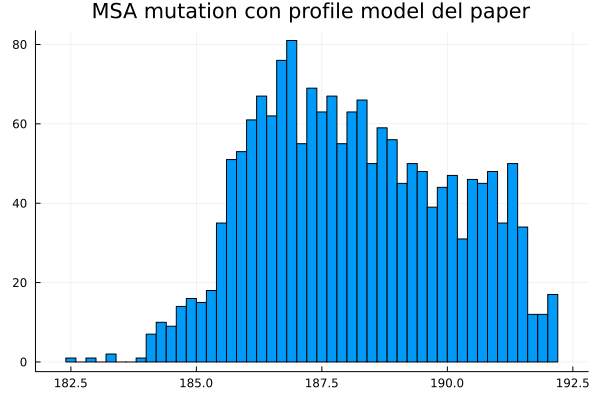

In [209]:
histogram(prof_energy_mut_paper, bins=50, title= "MSA mutation con profile model del paper", label =:false)

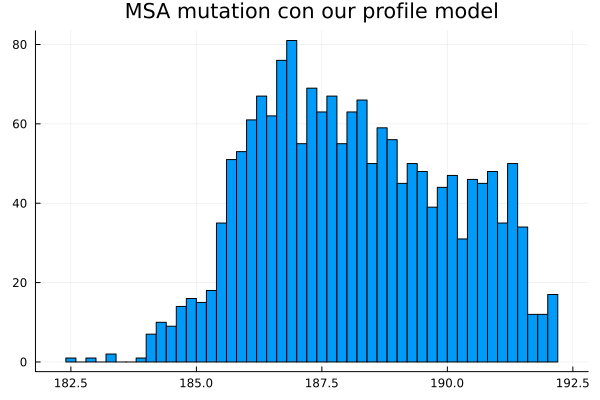

In [210]:
histogram(prof_energy_mut_model, bins=50, title= "MSA mutation con our profile model", label =:false)

# Test with different scores

In [212]:
fields_model_03 = JLD.load("h_0.3.jld")["data"]
couplings_model_03 = JLD.load("Jij_0.3.jld")["data"];

fields_model_04 = JLD.load("h_0.4.jld")["data"]
couplings_model_04 = JLD.load("Jij_0.4.jld")["data"];

fields_model_05 = JLD.load("h_0.5.jld")["data"]
couplings_model_05 = JLD.load("Jij_0.5.jld")["data"];

fields_model_06 = JLD.load("h_0.6.jld")["data"]
couplings_model_06 = JLD.load("Jij_0.6.jld")["data"];

fields_model_07 = JLD.load("h_0.7.jld")["data"]
couplings_model_07 = JLD.load("Jij_0.7.jld")["data"];

In [224]:
fields_model_08 = JLD.load("h_0.8.jld")["data"]
couplings_model_08 = JLD.load("Jij_0.8.jld")["data"];

In [213]:
full_energy_03 = full_model_energy(q, fields_model_03, couplings_model_03, MSA_mut, L_mut);
full_energy_04 = full_model_energy(q, fields_model_04, couplings_model_04, MSA_mut, L_mut);
full_energy_05 = full_model_energy(q, fields_model_05, couplings_model_05, MSA_mut, L_mut);
full_energy_06 = full_model_energy(q, fields_model_06, couplings_model_06, MSA_mut, L_mut);
full_energy_07 = full_model_energy(q, fields_model_07, couplings_model_07, MSA_mut, L_mut);

In [225]:
full_energy_08 = full_model_energy(q, fields_model_08, couplings_model_08, MSA_mut, L_mut);

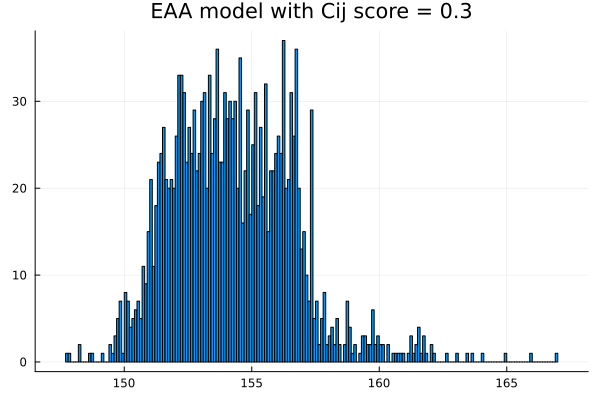

In [232]:
histogram(full_energy_03, bins=200, title= "EAA model with Cij score = 0.3", label =:false)

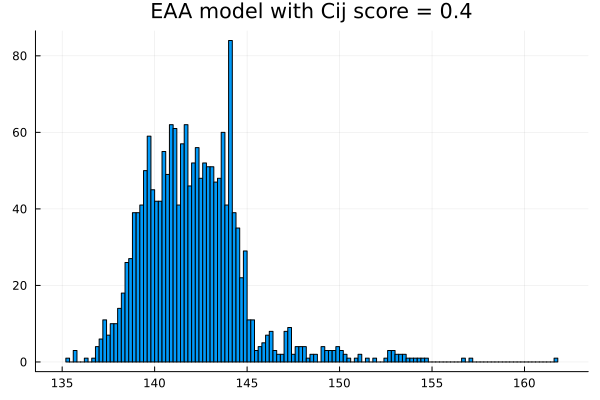

In [233]:
histogram(full_energy_04, bins=200, title= "EAA model with Cij score = 0.4", label =:false)

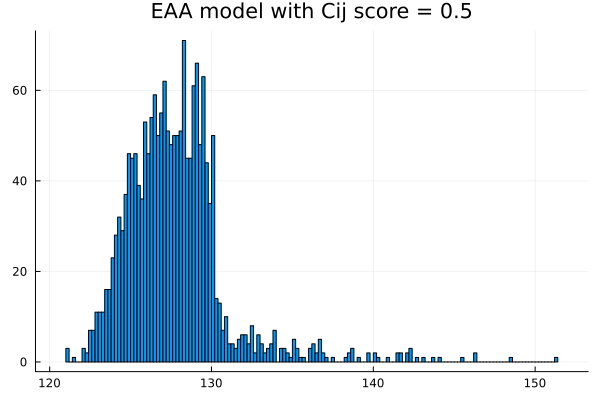

In [234]:
histogram(full_energy_05, bins=200, title= "EAA model with Cij score = 0.5", label =:false)

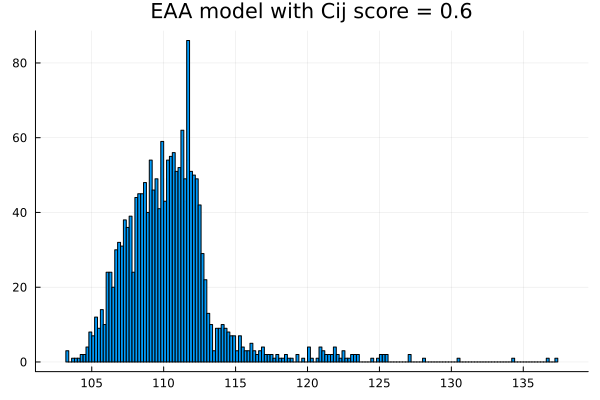

In [235]:
histogram(full_energy_06, bins=200, title= "EAA model with Cij score = 0.6", label =:false)

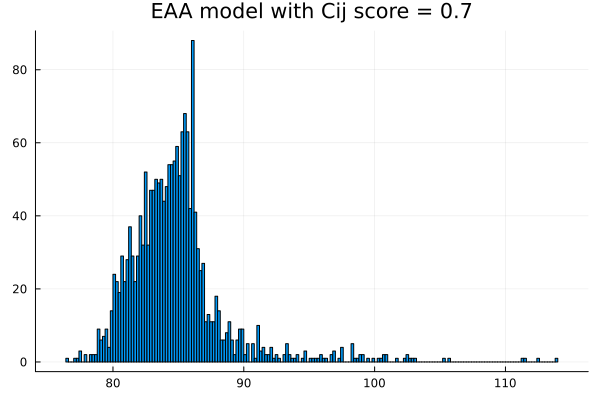

In [236]:
histogram(full_energy_07, bins=200, title= "EAA model with Cij score = 0.7", label =:false)

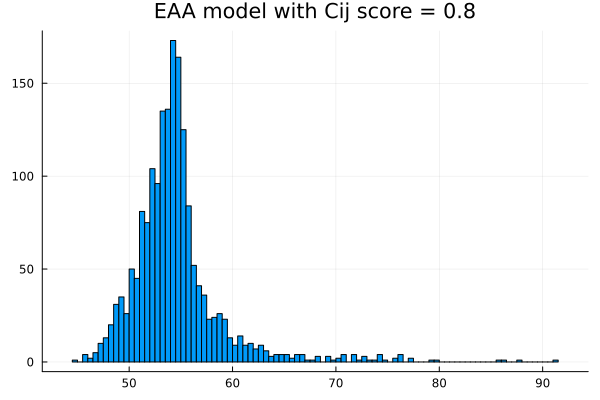

In [239]:
histogram(full_energy_08, bins=200, title= "EAA model with Cij score = 0.8", label =:false)